### Import necessary packages

In [1]:
# Install required packages here if needed (remove '#')
!pip3 install pandas
!pip3 install pandas_datareader
!pip3 install datetime
!pip3 install statsmodels

In [2]:
import pandas as pd
import pandas_datareader as web
import datetime
import statsmodels.api as sm

### Functions to import price data

In [3]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    try:
        stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    except:
        return None

    prices = stock_data.loc[:, "Adj Close"]
    prices = prices.fillna(method="ffill")

    return prices

In [4]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    dates = stock_data.index
    
    return dates

### Generate input table

In [5]:
index_symbol = "^GSPC" # Index symbol (by default "^GSPC" for the S&P500 index)
stock_symbol = "MSFT" # Stock symbol

# Generate list of trading days
start_date = datetime.datetime(2016, 8, 1)
end_date = datetime.datetime(2021, 9, 1)
interval = 'm' # Date interval, by default daily ('d')
date_list = get_date_list(index_symbol, start_date, end_date, interval=interval)

# Generate empty dataframe
column_header_index = "Index price ({})".format(index_symbol)
column_header_stock = "Stock price ({})".format(stock_symbol)
df = pd.DataFrame(
        columns=[column_header_index, column_header_stock], index=date_list
    )

# Sort dataframe based on date
df = df.sort_index(ascending=False)  

# Import price series into dataframe
try:
    price_series = read_price_data(index_symbol, start_date, end_date, interval=interval)
    df[column_header_index] = price_series
    
    price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)
    df[column_header_stock] = price_series  
except:
    print('Import failed')

# Print dataframe
df

,Index price (^GSPC),Stock price (MSFT)
Date,,
2021-09-01,4458.580078,295.709991
2021-08-01,4522.680176,301.303192
2021-07-01,4395.259766,284.365601
2021-06-01,4297.500000,270.382385
2021-05-01,4204.109863,248.628799
...,...,...
2016-12-01,2238.830078,57.882114
2016-11-01,2198.810059,55.754288
2016-10-01,2126.149902,55.439716


In [6]:
mtl_ret = df.resample('M').ffill().pct_change()
mtl_ret = mtl_ret.dropna(axis=0)
mtl_ret.head()

,Index price (^GSPC),Stock price (MSFT)
Date,,
2016-09-30,-0.001234,0.008684
2016-10-31,-0.019426,0.040278
2016-11-30,0.034175,0.005674
2016-12-31,0.018201,0.038164
2017-01-31,0.017884,0.040393


### Output:
+ the (CAPM-)beta of the share, with the index taken as the market portfolio.
+ the corresponding $R^2$ value
+ a scatterplot depicting the underlying regression

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

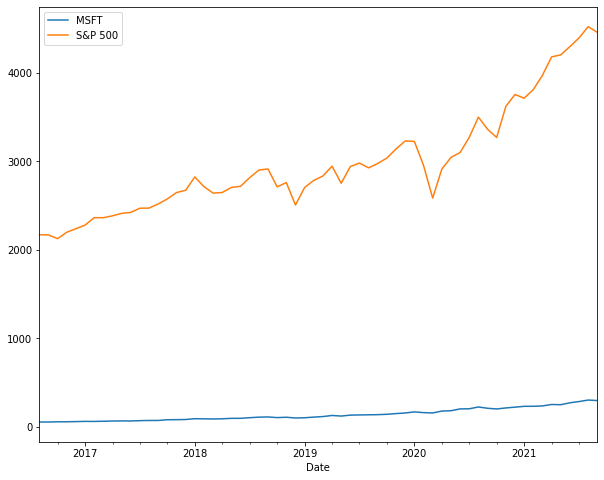

In [8]:
# plot the stock and the index
df[column_header_stock].plot(label=stock_symbol, figsize=(10,8))
df[column_header_index].plot(label="S&P 500")
plt.legend()

### CAPM Looks right

+ Microsoft stock price appears to be following the market

$\beta = \frac{\sigma_i M}{\sigma^2_M}$

In [14]:
X = mtl_ret[column_header_index]
y = mtl_ret[column_header_stock]

X_sm = sm.add_constant(X)

/home/mark/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
model = sm.OLS(y, X_sm)

In [16]:
results = model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Stock price (MSFT)   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     60.41
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.33e-10
Time:                        13:04:28   Log-Likelihood:                 122.00
No. Observations:                  61   AIC:                            -240.0
Df Residuals:                      59   BIC:                            -235.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0198      0.004      4.437      0.000       0.011       0.029
Index price (^GSPC)     0.7778      0.100      7.772      0.000       0.578       0.978
==============================================================================
Omnibus:                        1.429   Durbin-Watson:                   2.510
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.425
Skew:                           0.342   Prob(JB):                        0.490
Kurtosis:                       2.697   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# alpha
results.params[0]

0.01975153634494822

In [23]:
# beta
results.params[1]

0.777843743789187

In [19]:
# r-squared
results.rsquared

0.5059073594261803

let's make that into a function real quick

In [ ]:
def generateDataFrame(index_symbol, stock_symbol):
    column_header_index = "Index price ({})".format(index_symbol)
    column_header_stock = "Stock price ({})".format(stock_symbol)
    df = pd.DataFrame(
        columns=[column_header_index, column_header_stock], index=date_list
    )

    # Sort dataframe based on date
    df = df.sort_index(ascending=False)
    return df

In [ ]:
def populateDataFrame(df, index_symbol, stock_symbol, start_date, end_date)
    try:
        price_series = read_price_data(index_symbol, start_date, end_date, interval=interval)
        df[column_header_index] = price_series
    
        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)
        df[column_header_stock] = price_series  
    except:
        print('Import failed')

In [ ]:
params = {
    "start_date": [2016, 8, 1],
    "end_date": [2021, 9, 1],
    "date_interval": "m",
    "stock_symbol": "TSLA",
    "index_symbol": "^GSPC"
}

def calculateCAPMvalues(params):
    dataFrame = generateDataFrame(params["index_symbol"], params["stock_symbol"])
    populateDataFrame(dataFrame, params["index_symbol"], params["stock_symbol"])
    
    

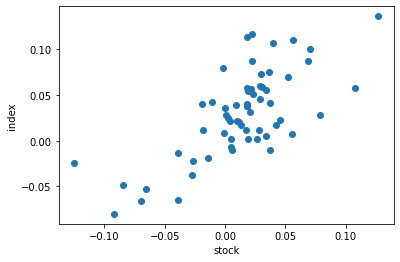

In [24]:
import matplotlib.pyplot as plt

plt.scatter(mtl_ret[column_header_index], mtl_ret[column_header_stock], marker='o')
plt.xlabel('stock')
plt.ylabel('index')
plt.show()

### Example of mathematical notation using LaTeX syntax
CAPM: $\mathbb{E}(R_i)=R_f+\beta_i (\mathbb{E}(R_m)-R_f)$ 

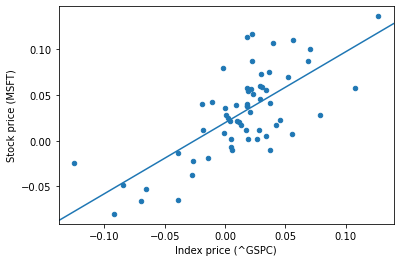

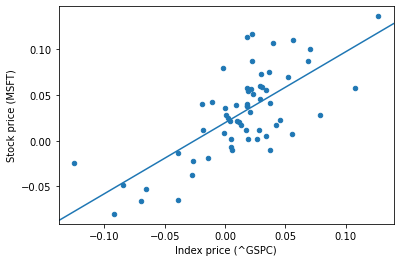

In [26]:
from statsmodels.graphics.regressionplots import abline_plot
ax = mtl_ret.plot(x=column_header_index, y=column_header_stock, kind='scatter')
abline_plot(model_results=results, ax=ax)

Now compute the beta of ford tesla priceline and expedia